In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
from config import weather_api_key
import time
from datetime import datetime
import requests
from scipy.stats import linregress

In [2]:
# Create a set of random latitude and longitude combos
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high = 180.000, size =1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
#Add the lats and longs to a list.
coordinates = list(lat_lngs)

In [4]:
#create a list for holding the cities
cities=[]
# identify the nearest city for each lat & long combo
for coordinate in coordinates:
    city=citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #If the city is unique, then we add it to the list of cities.
    if city not in cities:
        cities.append(city)
        
#print the city count to confirm sufficient count.
len(cities)

614

In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="+weather_api_key

In [6]:
#Create an empty list to hold the weather data
city_data=[]
#Print the beginning of the logging.
print("Beginning Data Retrieval   ")
print("---------------------------")

#Create counters.
record_count = 1
set_count = 1

#Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    #Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i>=50):
        set_count+=1
        record_count=1
        time.sleep(60)
    #create endpoint URL with each city.
    city_url = url+"&q="+city.replace(" ","+")
    
    #Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    #Add 1 to rcord count.
    record_count+=1
    
# Run an API request for each of the cities.
    try:
        #Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        #Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
        

Beginning Data Retrieval   
---------------------------
Processing Record 1 of Set 1 | guerrero negro
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | severo-kurilsk
Processing Record 4 of Set 1 | puerto ayora
Processing Record 5 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 6 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 7 of Set 1 | tiksi
Processing Record 8 of Set 1 | port alfred
Processing Record 9 of Set 1 | port elizabeth
Processing Record 10 of Set 1 | ixtapa
Processing Record 11 of Set 1 | faanui
Processing Record 12 of Set 1 | carnarvon
Processing Record 13 of Set 1 | truth or consequences
Processing Record 14 of Set 1 | hithadhoo
Processing Record 15 of Set 1 | baglung
Processing Record 16 of Set 1 | castro
Processing Record 17 of Set 1 | atuona
Processing Record 18 of Set 1 | provideniya
Processing Record 19 of Set 1 | san policarpo
Processing Record 20 of Set 1 | college
Processing Record 21 of Set 1 | mba

Processing Record 36 of Set 4 | cap malheureux
Processing Record 37 of Set 4 | sadovoye
Processing Record 38 of Set 4 | tuktoyaktuk
Processing Record 39 of Set 4 | beloha
Processing Record 40 of Set 4 | alexandria
Processing Record 41 of Set 4 | krasnyy oktyabr
Processing Record 42 of Set 4 | blairmore
Processing Record 43 of Set 4 | tumannyy
City not found. Skipping...
Processing Record 44 of Set 4 | jodhpur
Processing Record 45 of Set 4 | bandar-e anzali
Processing Record 46 of Set 4 | pinawa
Processing Record 47 of Set 4 | ribeira grande
Processing Record 48 of Set 4 | toora-khem
Processing Record 49 of Set 4 | coquimbo
Processing Record 50 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 1 of Set 5 | ambilobe
Processing Record 2 of Set 5 | gasa
Processing Record 3 of Set 5 | lucea
Processing Record 4 of Set 5 | nizhneyansk
City not found. Skipping...
Processing Record 5 of Set 5 | ballina
Processing Record 6 of Set 5 | faya
Processing Record 7 of Set 5 | san qu

Processing Record 21 of Set 8 | gimli
Processing Record 22 of Set 8 | quatre cocos
Processing Record 23 of Set 8 | sept-iles
Processing Record 24 of Set 8 | angermunde
Processing Record 25 of Set 8 | diffa
Processing Record 26 of Set 8 | kuala terengganu
Processing Record 27 of Set 8 | broome
Processing Record 28 of Set 8 | vanimo
Processing Record 29 of Set 8 | sumoto
Processing Record 30 of Set 8 | labuhan
Processing Record 31 of Set 8 | burica
City not found. Skipping...
Processing Record 32 of Set 8 | margate
Processing Record 33 of Set 8 | krasnoselkup
Processing Record 34 of Set 8 | goderich
Processing Record 35 of Set 8 | suffolk
Processing Record 36 of Set 8 | tessalit
Processing Record 37 of Set 8 | tsihombe
City not found. Skipping...
Processing Record 38 of Set 8 | aljezur
Processing Record 39 of Set 8 | darhan
Processing Record 40 of Set 8 | iroquois falls
Processing Record 41 of Set 8 | hovd
Processing Record 42 of Set 8 | beringovskiy
Processing Record 43 of Set 8 | kyrks

Processing Record 8 of Set 12 | kuah
Processing Record 9 of Set 12 | khasan
Processing Record 10 of Set 12 | mount gambier
Processing Record 11 of Set 12 | donnacona
Processing Record 12 of Set 12 | chaoyang
Processing Record 13 of Set 12 | kavieng
Processing Record 14 of Set 12 | tiarei
Processing Record 15 of Set 12 | buncrana
Processing Record 16 of Set 12 | carmen
Processing Record 17 of Set 12 | porto santo
Processing Record 18 of Set 12 | manokwari
Processing Record 19 of Set 12 | ifanadiana
Processing Record 20 of Set 12 | nacala
Processing Record 21 of Set 12 | honningsvag
Processing Record 22 of Set 12 | cockburn town
Processing Record 23 of Set 12 | geraldton
Processing Record 24 of Set 12 | agha jari
City not found. Skipping...
Processing Record 25 of Set 12 | cabinda
Processing Record 26 of Set 12 | san rafael
Processing Record 27 of Set 12 | baykit
Processing Record 28 of Set 12 | la roda
Processing Record 29 of Set 12 | blagoyevo
Processing Record 30 of Set 12 | dire
Proc

In [7]:
len(city_data)

559

In [8]:
city_data

[{'City': 'Guerrero Negro',
  'Lat': 27.9769,
  'Lng': -114.0611,
  'Max Temp': 62.46,
  'Humidity': 65,
  'Cloudiness': 99,
  'Wind Speed': 14.03,
  'Country': 'MX',
  'Date': '2022-02-02 00:24:41'},
 {'City': 'Mataura',
  'Lat': -46.1927,
  'Lng': 168.8643,
  'Max Temp': 77.7,
  'Humidity': 58,
  'Cloudiness': 93,
  'Wind Speed': 5.55,
  'Country': 'NZ',
  'Date': '2022-02-02 00:26:57'},
 {'City': 'Severo-Kurilsk',
  'Lat': 50.6789,
  'Lng': 156.125,
  'Max Temp': 30.06,
  'Humidity': 78,
  'Cloudiness': 88,
  'Wind Speed': 11.48,
  'Country': 'RU',
  'Date': '2022-02-02 00:26:58'},
 {'City': 'Puerto Ayora',
  'Lat': -0.7393,
  'Lng': -90.3518,
  'Max Temp': 75.54,
  'Humidity': 94,
  'Cloudiness': 72,
  'Wind Speed': 3,
  'Country': 'EC',
  'Date': '2022-02-02 00:26:59'},
 {'City': 'Tiksi',
  'Lat': 71.6872,
  'Lng': 128.8694,
  'Max Temp': -11.16,
  'Humidity': 97,
  'Cloudiness': 100,
  'Wind Speed': 6.87,
  'Country': 'RU',
  'Date': '2022-02-02 00:27:00'},
 {'City': 'Port Alfred

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Guerrero Negro,27.9769,-114.0611,62.46,65,99,14.03,MX,2022-02-02 00:24:41
1,Mataura,-46.1927,168.8643,77.70,58,93,5.55,NZ,2022-02-02 00:26:57
2,Severo-Kurilsk,50.6789,156.1250,30.06,78,88,11.48,RU,2022-02-02 00:26:58
3,Puerto Ayora,-0.7393,-90.3518,75.54,94,72,3.00,EC,2022-02-02 00:26:59
4,Tiksi,71.6872,128.8694,-11.16,97,100,6.87,RU,2022-02-02 00:27:00
...,...,...,...,...,...,...,...,...,...
554,Ivankiv,50.9386,29.8943,25.03,93,33,7.74,UA,2022-02-02 00:46:06
555,Matagami,49.7502,-77.6328,28.51,74,100,25.32,CA,2022-02-02 00:46:06
556,Roald,62.5833,6.1333,38.34,87,100,9.22,NO,2022-02-02 00:46:07
557,Zabol,32.2500,67.2500,33.17,100,100,8.23,AF,2022-02-02 00:46:08


In [10]:
city_data_df.columns

Index(['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed', 'Country', 'Date'],
      dtype='object')

In [11]:
city_data_df = city_data_df[['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed']]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Guerrero Negro,MX,2022-02-02 00:24:41,27.9769,-114.0611,62.46,65,99,14.03
1,Mataura,NZ,2022-02-02 00:26:57,-46.1927,168.8643,77.70,58,93,5.55
2,Severo-Kurilsk,RU,2022-02-02 00:26:58,50.6789,156.1250,30.06,78,88,11.48
3,Puerto Ayora,EC,2022-02-02 00:26:59,-0.7393,-90.3518,75.54,94,72,3.00
4,Tiksi,RU,2022-02-02 00:27:00,71.6872,128.8694,-11.16,97,100,6.87
...,...,...,...,...,...,...,...,...,...
554,Ivankiv,UA,2022-02-02 00:46:06,50.9386,29.8943,25.03,93,33,7.74
555,Matagami,CA,2022-02-02 00:46:06,49.7502,-77.6328,28.51,74,100,25.32
556,Roald,NO,2022-02-02 00:46:07,62.5833,6.1333,38.34,87,100,9.22
557,Zabol,AF,2022-02-02 00:46:08,32.2500,67.2500,33.17,100,100,8.23


In [12]:
#create the output file (CSV)
output_data_file = "weather_data/cities.csv"
#Export the City_data to a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

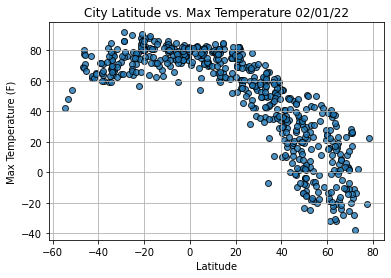

In [14]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

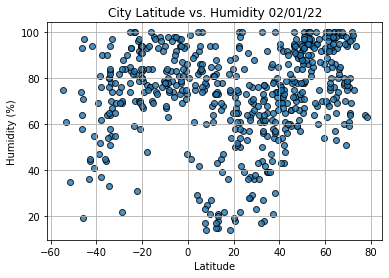

In [15]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

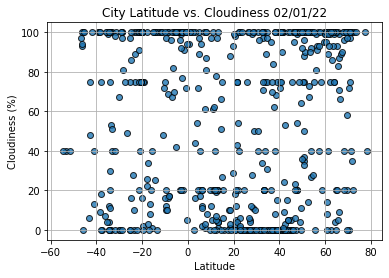

In [16]:
# Build the scatter plot for latitude vs. Cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

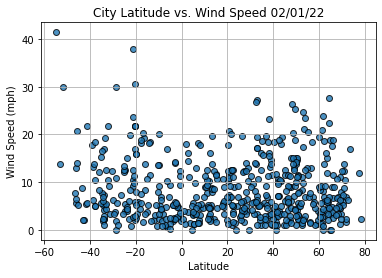

In [17]:
# Build the scatter plot for latitude vs. wind_speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [64]:
# Create a function to perform linear regression on the weather data and 
#plot a regression line and equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    #Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    #Calculate the regression line "Y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    #Get the equation of th eline.
    line_eq="y = "+str(round(slope,2))+"x + "+ str(round(intercept, 2))
    
    #Create a scatter plot and plot the regression line.
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    #Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize = 15, color = "red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    
    
    

In [54]:
index13 = city_data_df.loc[13]
index13

City                       Castro
Country                        BR
Date          2022-02-02 00:23:43
Lat                      -24.7911
Lng                      -50.0119
Max Temp                    64.04
Humidity                       93
Cloudiness                     16
Wind Speed                   5.41
Name: 13, dtype: object

In [55]:
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0]

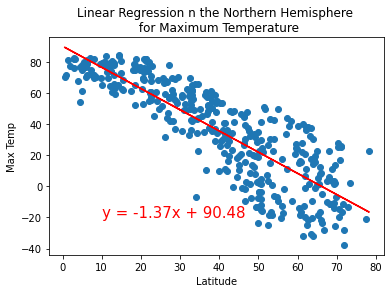

LinregressResult(slope=-1.3668116384551887, intercept=90.48353451738328, rvalue=-0.8490805816085276, pvalue=5.003448500712242e-109, stderr=0.04328292353989032, intercept_stderr=1.908410060832372)


In [66]:
#Linear regression on the Norhtern Hemispher
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
#Call the function
plot_linear_regression(x_values, y_values, 
                       'Linear Regression n the Northern Hemisphere \n for Maximum Temperature', 'Max Temp', (10,-20))

print(linregress(x_values, y_values))



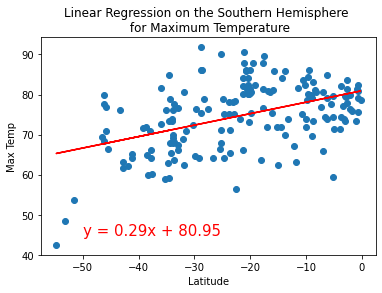

LinregressResult(slope=0.28580978198262535, intercept=80.94596750980432, rvalue=0.45809843443890963, pvalue=2.975545140571213e-10, stderr=0.042660756594831435, intercept_stderr=1.090475170844907)


In [67]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,45))
print(linregress(x_values, y_values))


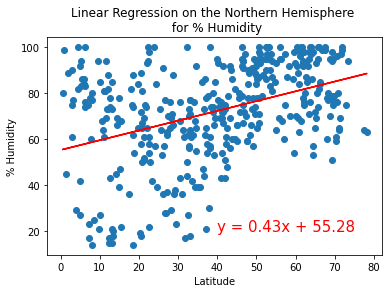

LinregressResult(slope=0.42574783989718873, intercept=55.281624768074465, rvalue=0.3979870074550424, pvalue=3.5381462201660224e-16, stderr=0.04995102519060907, intercept_stderr=2.202416824612009)


In [68]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,20))
print(linregress(x_values, y_values))

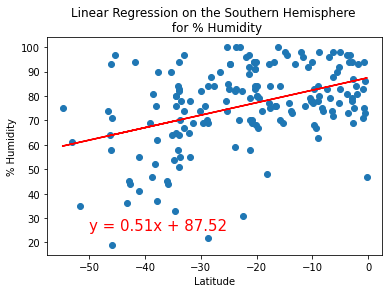

LinregressResult(slope=0.5112612966829039, intercept=87.52073721416724, rvalue=0.41478119675321706, pvalue=1.6970789893508744e-08, stderr=0.0862748633244747, intercept_stderr=2.205319451244235)


In [69]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,25))
print(linregress(x_values, y_values))

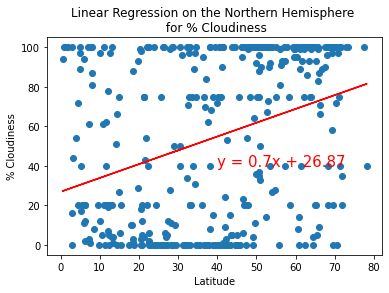

LinregressResult(slope=0.6985382942751077, intercept=26.873819706285005, rvalue=0.33073938475865633, pvalue=2.34442550901427e-11, stderr=0.10145064026887414, intercept_stderr=4.473113337378222)


In [70]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(40,40))
print(linregress(x_values, y_values))

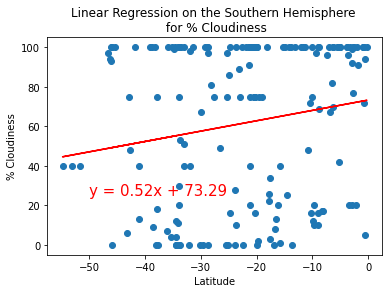

LinregressResult(slope=0.5239406540324407, intercept=73.28752919810076, rvalue=0.17697230529493607, pvalue=0.020583018298178407, stderr=0.22414227932209213, intercept_stderr=5.7294246480133495)


In [71]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,25))
print(linregress(x_values, y_values))

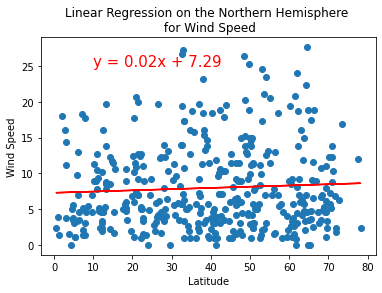

LinregressResult(slope=0.016988403423835282, intercept=7.290295448029107, rvalue=0.05750464839767349, pvalue=0.2584800774614573, stderr=0.01501193626589557, intercept_stderr=0.6618991477321555)


In [74]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(10, 25))
print(linregress(x_values, y_values))

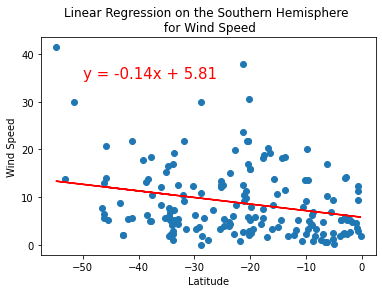

LinregressResult(slope=-0.13781689883329115, intercept=5.806659286754879, rvalue=-0.2518177307218459, pvalue=0.0008921519834767726, stderr=0.040742443332660715, intercept_stderr=1.0414401056169942)


In [76]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))
print(linregress(x_values, y_values))